# **Predicting the price of diamonds using Poisson Regression**

**Group Members**


*   Keith Gompf
*   Dennis Solodovnik
*   Andrew Crooks


#Introduction

Which of these diamonds do you think is the most valuable

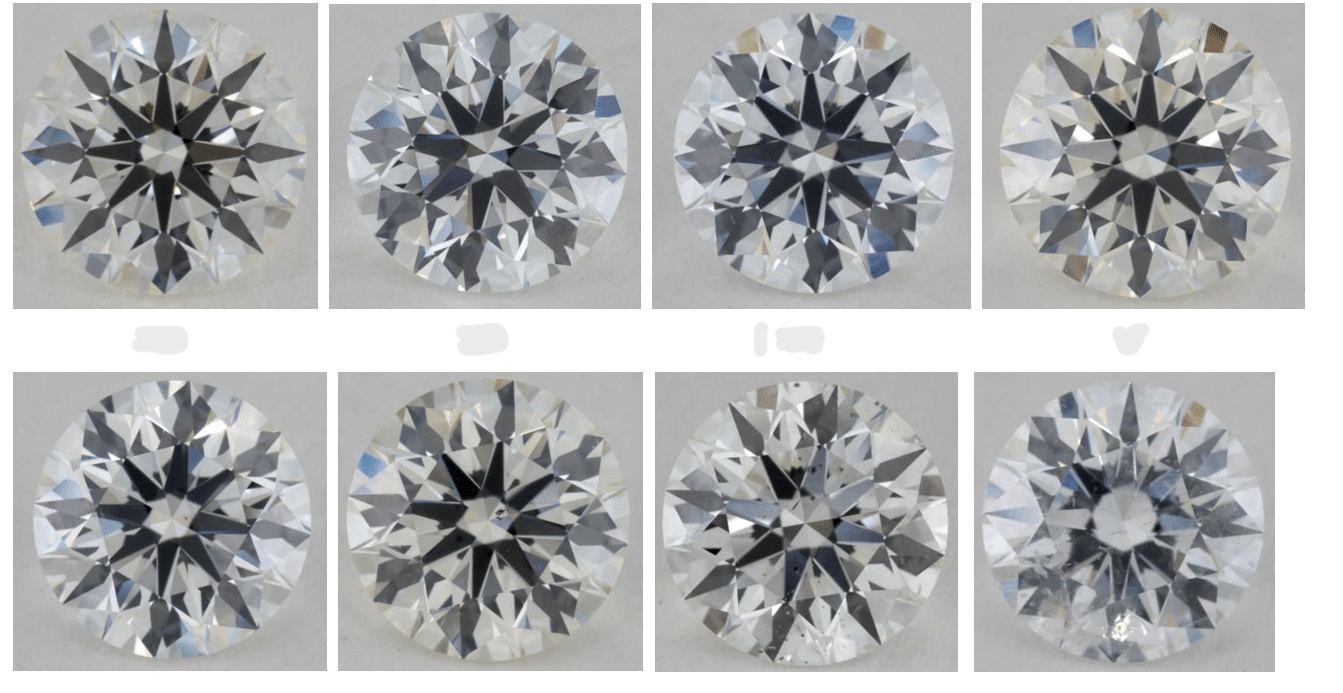

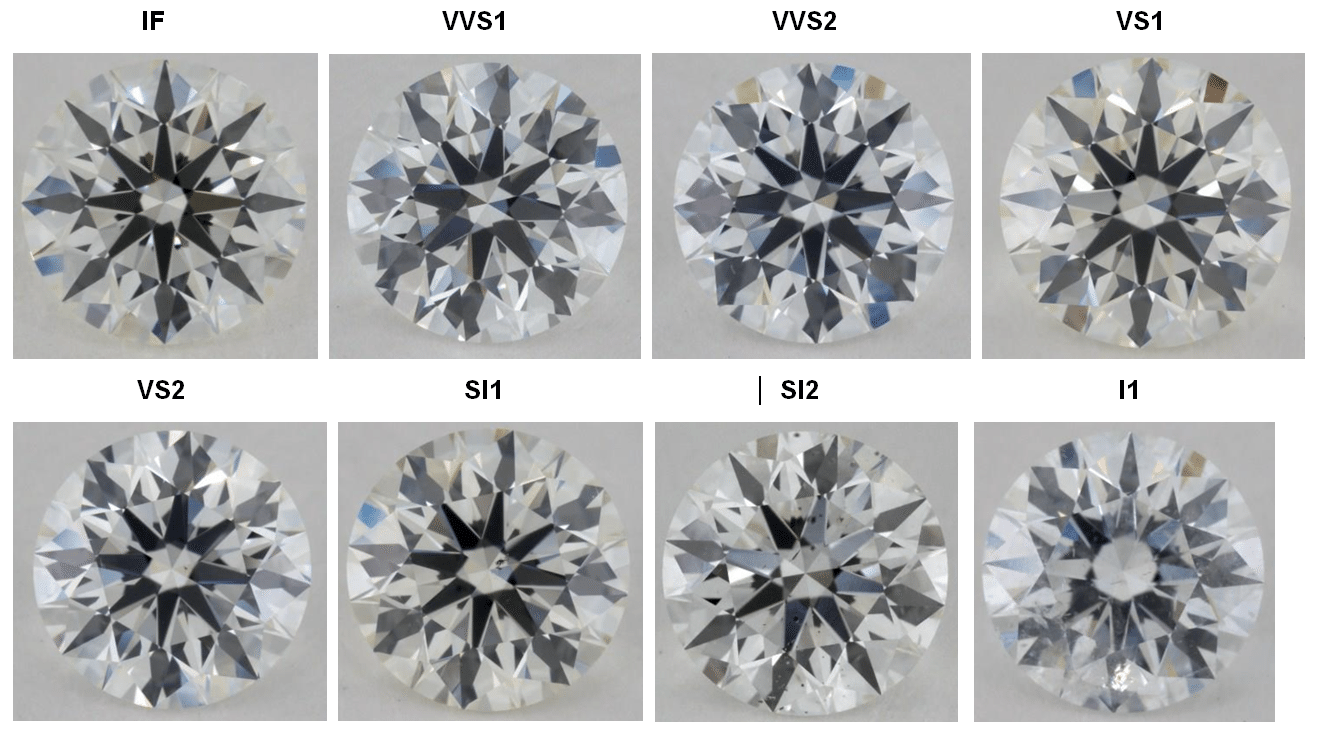

Well, we lied about them not being any particular order, however you can see that it is really difficult to see these differences to the untrained naked eye...

**Color Scale**

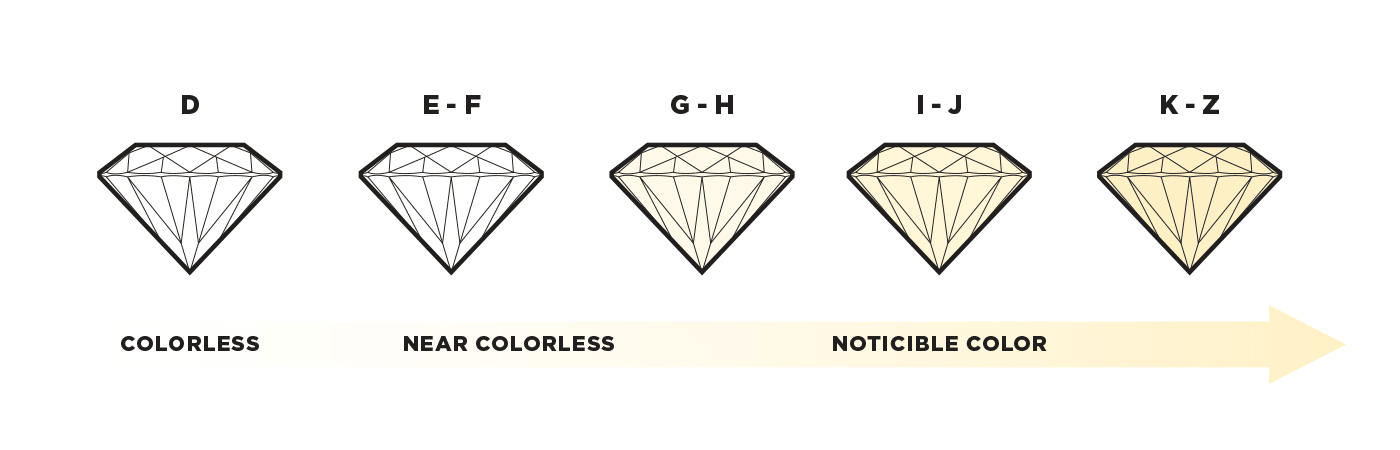

**Cut Scale**

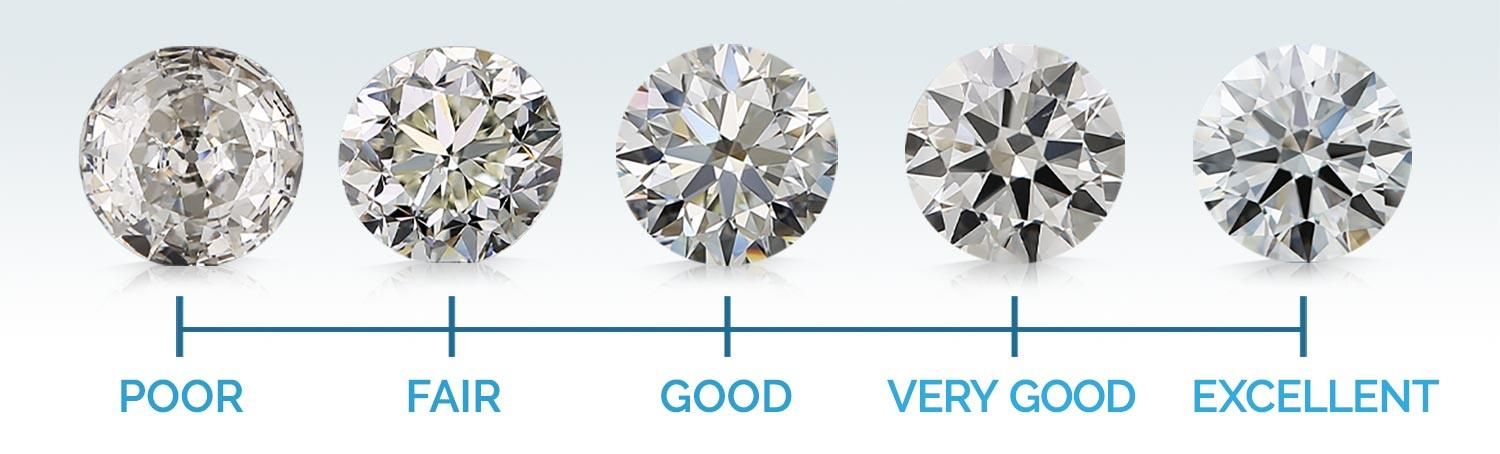

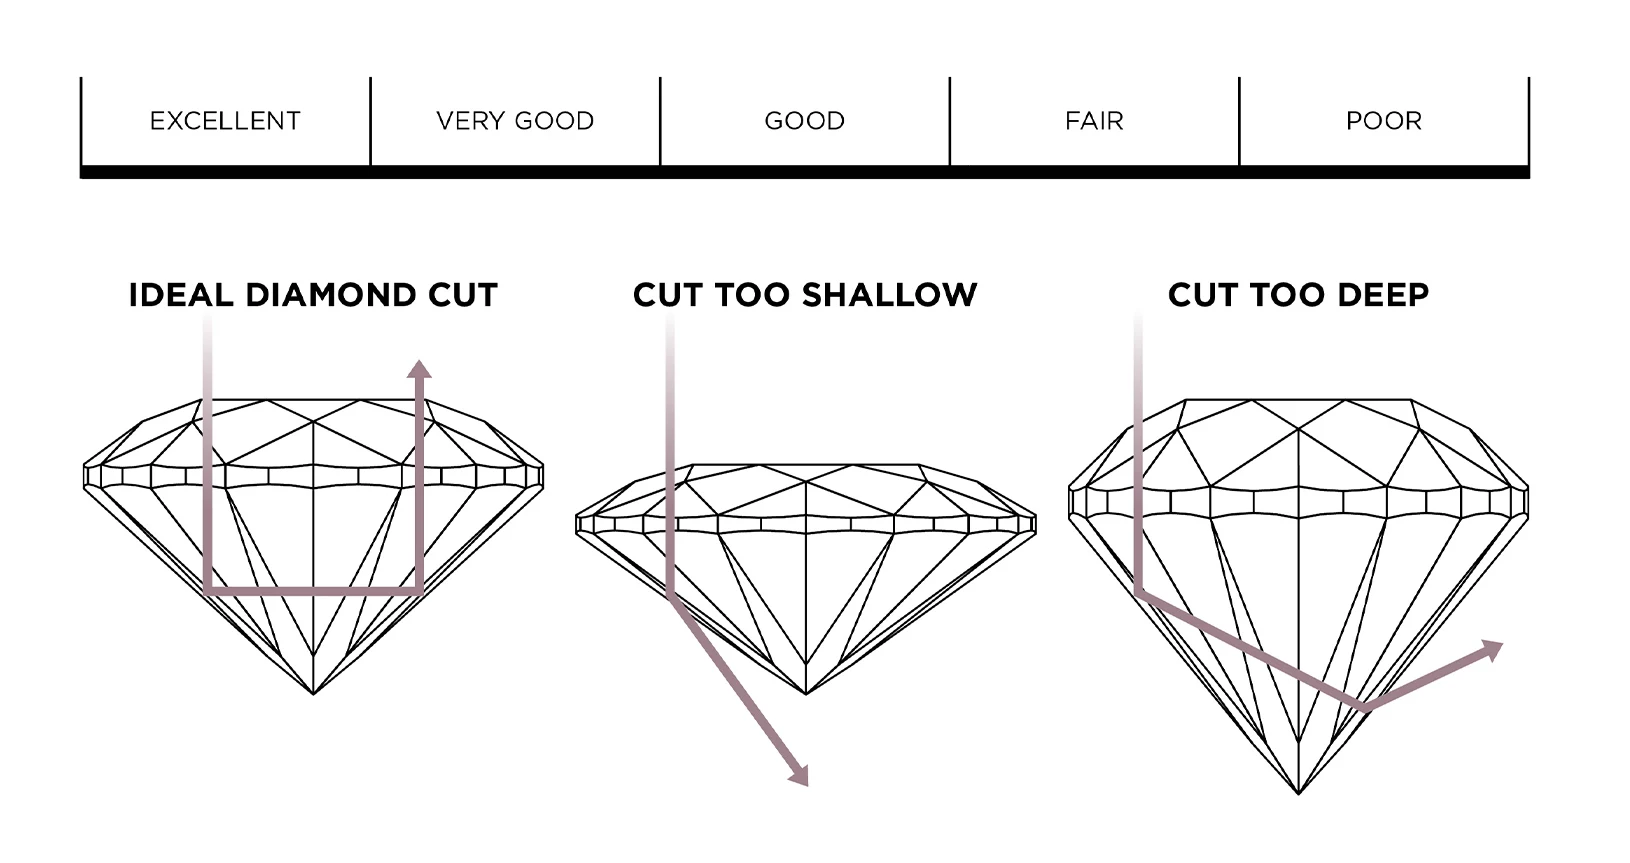

Generally speaking, a yellow tint to a diamond lowers its value

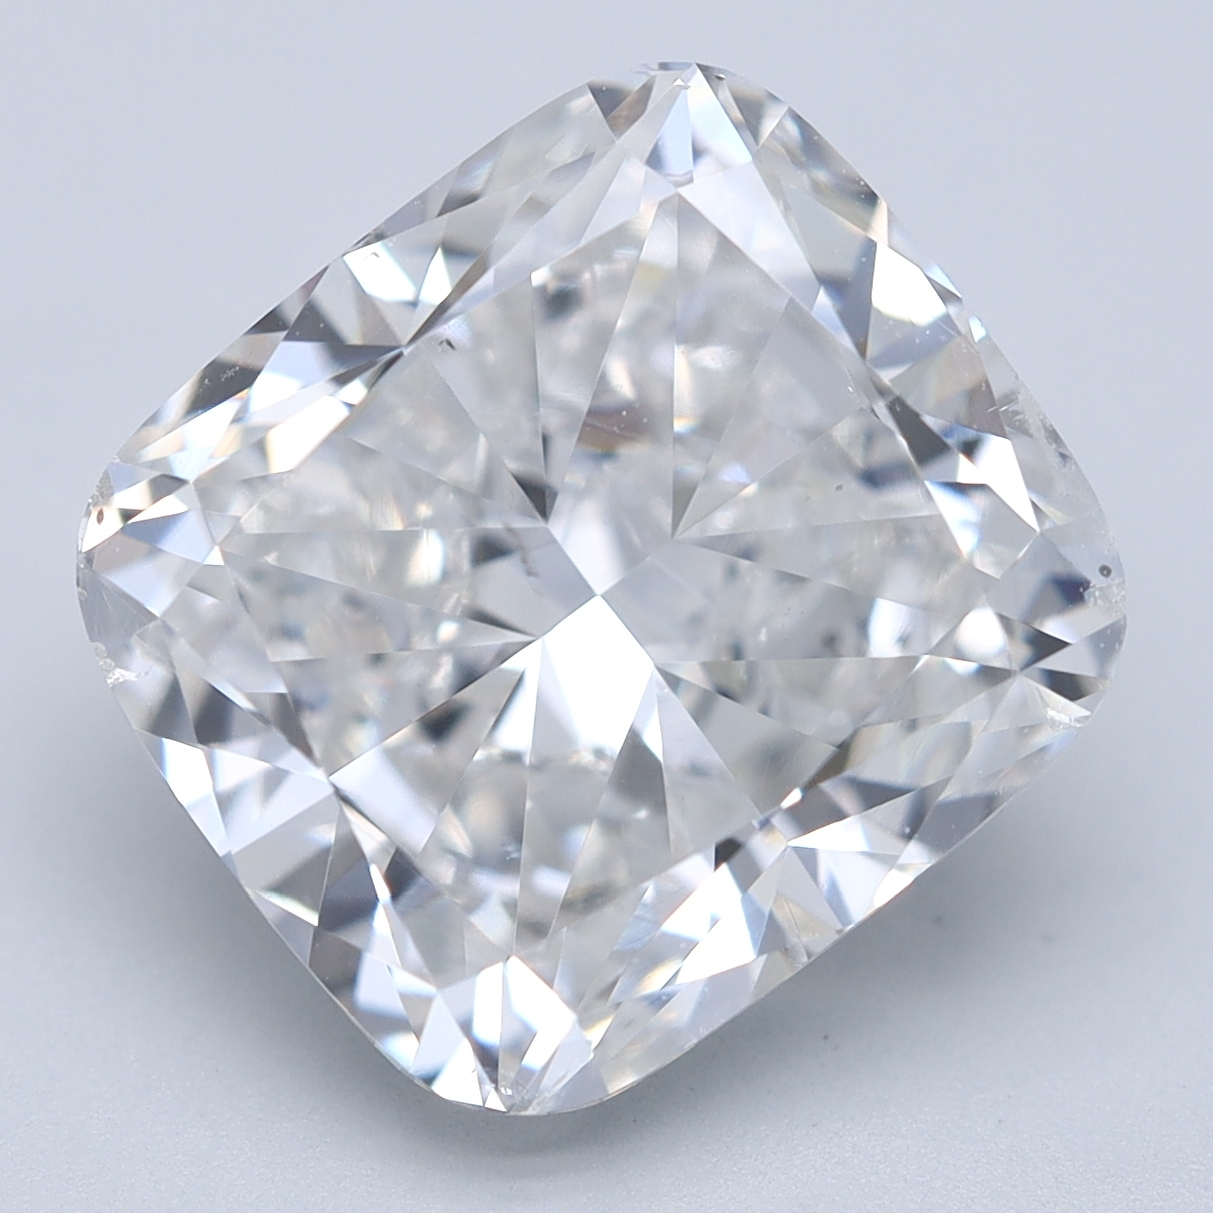

This is a 5.02 carat, Clarity: SI1, Color H, Cut:Very good
Anyone wanna try to guess the price?

#Why is Machine learning needed?

An accurate machine learning model is needed because there are many factors that affect the price of the diamond drastically. For example, we can have a 1.0 carat flawless diamond priced anywhere between 5,000 and 10,000 dollars. Contrarily, we can have a 5.0 carat diamond like above and it could be worth upwards of $90,000! Assigning value to a diamond can be a long process, so if we have all of the requried values, then we can assign the value to a diamond much faster than a human can.

#Our data

Another reason to use machine learning model is because we have lots of prior data so we can create a good training set. We utilized the seaborn dataset, 'diamonds'. This dataset had everything we needed to predict diamonds. It had carat, cut, color, clarity, depth, table, price, x, y, and z. This dataset was perfect because each of these different columns in the dataset could be used as features, which will be used to predict the price

#Importing various tools and set-up code

In [ ]:
#@title
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import PoissonRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import scipy # needed for PoissonRegressor solver

#load the diamonds data set
diamonds = sns.load_dataset('diamonds')

##Checking for null values and the first 10 results of 'diamonds'

In [ ]:
# Checking the info to see if there are any null values to clean, and there are none.
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [ ]:
#@title
# check out the head of the data
diamonds.head(10)

carat        cut color clarity  depth  table  price     x     y     z
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8   0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39

#Machine learning Model set-up
*   Our machine learning model splits 'carat', 'cut', 'color', 'clarity',       'depth', 'table', 'x', 'y', 'z' into training and testing sets.
*   The goal from our machine learning model is to accurately predict the price of diamonds given these factors listed above.



In [ ]:
# select columns to keep
X = diamonds[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]

#Encoding categorical variables
encoder = OneHotEncoder()
X_encoded = pd.DataFrame(encoder.fit_transform(X[['cut', 'clarity', 'color']]).toarray())
X = pd.concat([X.drop(['cut', 'color', 'clarity'], axis=1), X_encoded], axis=1)

#price is dependent variable
y = diamonds['price']

In [ ]:
# split data into train and test sets
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# split training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train1, y_train1, test_size=0.25, random_state=42)

X_train.columns = X_train.columns.astype('string')

In [ ]:
#@title
# make data pipeline for Partial Least Squares Regression
pipe = make_pipeline(StandardScaler(), PoissonRegressor())

# apply scaling on training data
pipe.fit(X_train, y_train)

# predict values
y_pred_v = pipe.predict(X_valid)

# convert y_pred floats to nearest integer value
y_pred_v = (np.rint(y_pred_v)).astype(int)

#validation
r2 = r2_score(y_valid, y_pred_v)
results = pd.DataFrame({'actual': y_valid, 'predicted': y_pred_v})

#Validation of our model

Below, we can see our validation of the Machine Learning model. Generally speaking, a good baseline for accuracy is anything above 0.7. We achieved 0.96 or 96% accuracy for our model, and we even display, the actual number vs what our model predicted so we can clearly see how accurate it is. We can see that it is very accurate, most times it is off by about $300. But there are rare instances that it is off by double that amount.

In [ ]:
#@title
#r-squared value, anything > 0.7 is good
print('R-squared:', r2)
results

#0.9607359542157131

R-squared: 0.9552706987843999


actual  predicted
7193     4188       4226
11575    5038       5822
36646     948       1023
10039     417        491
19242    7978       6990
...       ...        ...
25236   13846      13147
39281     491        549
47783    1897       1955
47627    1882       1841
38956     489        546

[11463 rows x 2 columns]

#Visualization of our data

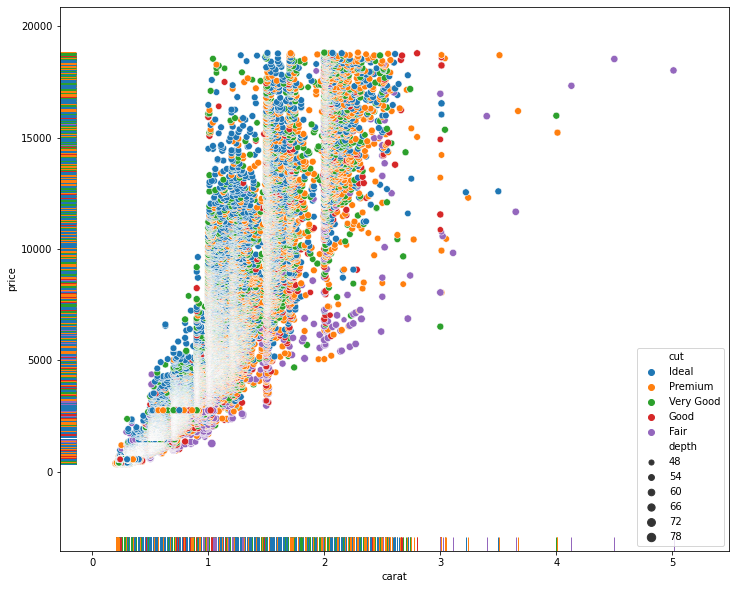

In [ ]:
#@title
plt.figure(figsize=(12,10))
sns.scatterplot(x="carat", y="price", hue="cut", size="depth", data=diamonds)
sns.rugplot(x="carat", y="price", hue="cut", data=diamonds)
plt.legend(loc='lower right')

Here we see a scatter plot of the different diamond prices and their trends based on the carat. The cut and depth are also taken into account by the different colors and sizes of the dots. The general trend is that carat and cut affects the price the most

<AxesSubplot:xlabel='clarity', ylabel='price'>

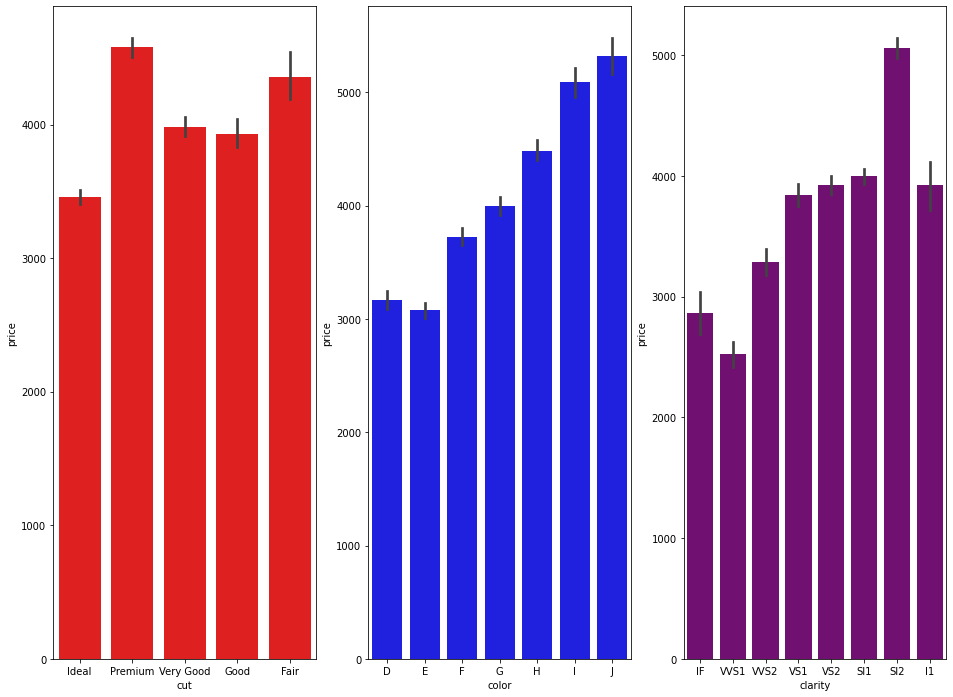

In [ ]:
#@title
#moves legion to bottom right to be able to see more of graph
fig, ba_axis = plt.subplots(1, 3, figsize=(16,12))
sns.barplot(x="cut", y="price", data=diamonds, ax = ba_axis[0], color="Red")

sns.barplot(x="color", y="price", data=diamonds, ax = ba_axis[1], color="blue")

sns.barplot(x="clarity", y="price", data=diamonds, ax = ba_axis[2], color="purple")

>  In this series of bar plots, we can see some counter-intuitive metrics. For instance, For the red bar plot, the ideal cut is spposed to be the more desirable choice, however we can see that it is the lowest rated. This could be due to the fact that the ideal cut diamonds perhaps were the smallest carat.

> The same instance happened with the color of the diamonds. We can see the most desirable color is valued the lowest. This could be due to the fact that some colors are worth more than others, or rather that the diamonds that had a less desirable color , had a better cut, claritym carat, ort depth.

> A similiar instance happened with the clarity bar-plot. We believe, like mentioned above, that these bar plots are not taking into account the other factors in determing price of diamonds. All in all, these barplots could be seen as misleading and we recognize that it is important to consider these plots and dive deeper into what makes a diamond so valuable.


#Final model run on test set

In [ ]:
y_pred_v.max()

26019

In [ ]:
# predict values
y_pred = pipe.predict(X_test)

# convert y_pred floats to nearest integer value
y_pred = (np.rint(y_pred)).astype(int)


#validation
r2_final = r2_score(y_test, y_pred)
print(r2_final)
results_final = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
results_final

0.9572538211248113


actual  predicted
1388      559        558
50052    2201       2608
41645    1238       1447
42377    1304       1520
17244    6901      10807
...       ...        ...
15200    6106       5634
38770    1046        888
16831    6713       6505
25214   13812      13197
41953     505        544

[8091 rows x 2 columns]